![banner](./data/home-sales-shutterstock-295804091-1068x601.jpg)

# King County Home Sales
**Authors:** [Jerry Vasquez](https://www.linkedin.com/in/jerry-vasquez-832b71224/), [Paul Lindquist](https://www.linkedin.com/in/paul-lindquist/), [Vu Brown](https://www.linkedin.com/in/austin-brown-b5211384/)

## Overview
***
This is our overview

## Business Problem
***
This is our business problem

## Data
***
This is where the data is sourced from with focuses:

## Methods
***
Descriptive analysis, etc.

## Exploratory Data Analysis
***

In [1]:
# Import libraries
from collections import Counter
import folium
import itertools
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import time
import scipy.stats as stats
import seaborn as sns
sns.set_theme(palette='magma_r')
from sklearn.dummy import DummyRegressor
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate, ShuffleSplit
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", UserWarning)

pd.set_option('display.max_rows', 500) # Allows Jupyter Notebook to expand how much data is shown.

In [2]:
# Load DataFrame
df = pd.read_csv('./data/kc_house_data.csv')

### Preliminary Exploratory Data Analysis
Understanding the aspects of the dataset...

In [3]:
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [4]:
df.shape

(21597, 21)

In [5]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [7]:
df.nunique(axis=0)

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [8]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

id           price      bedrooms     bathrooms  \
count       21597.000000    21597.000000  21597.000000  21597.000000   
mean   4580474287.770987   540296.573506      3.373200      2.115826   
std    2876735715.747780   367368.140101      0.926299      0.768984   
min       1000102.000000    78000.000000      1.000000      0.500000   
25%    2123049175.000000   322000.000000      3.000000      1.750000   
50%    3904930410.000000   450000.000000      3.000000      2.250000   
75%    7308900490.000000   645000.000000      4.000000      2.500000   
max    9900000190.000000  7700000.000000     33.000000      8.000000   

        sqft_living        sqft_lot        floors    sqft_above      yr_built  \
count  21597.000000    21597.000000  21597.000000  21597.000000  21597.000000   
mean    2080.321850    15099.408760      1.494096   1788.596842   1970.999676   
std      918.106125    41412.636876      0.539683    827.759761     29.375234   
min      370.000000      520.000000      1.000000    370.000000   1900.000000   
25%     1430.000000     5040.000000      1.000000   1190.000000   1951.000000   
50%     1910.000000     7618.000000      1.500000   1560.000000   1975.000000   
75%     2550.000000    10685.000000      2.000000   2210.000000   1997.000000   
max    13540.000000  1651359.000000      3.500000   9410.000000   2015.000000   

       yr_renovated       zipcode           lat          long sqft_living15  \
count  17755.000000  21597.000000  21597.000000  21597.000000  21597.000000   
mean      83.636778  98077.951845     47.560093   -122.213982   1986.620318   
std      399.946414     53.513072      0.138552      0.140724    685.230472   
min        0.000000  98001.000000     47.155900   -122.519000    399.000000   
25%        0.000000  98033.000000     47.471100   -122.328000   1490.000000   
50%        0.000000  98065.000000     47.571800   -122.231000   1840.000000   
75%        0.000000  98118.000000     47.678000   -122.125000   2360.000000   
max     2015.000000  98199.000000     47.777600   -121.315000   6210.000000   

          sqft_lot15  
count   21597.000000  
mean    12758.283512  
std     27274.441950  
min       651.000000  
25%      5100.000000  
50%      7620.000000  
75%     10083.000000  
max    871200.000000

In [9]:
df.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000 -0.016772  0.001150   0.005162    -0.012241 -0.131911   
price         -0.016772  1.000000  0.308787   0.525906     0.701917  0.089876   
bedrooms       0.001150  0.308787  1.000000   0.514508     0.578212  0.032471   
bathrooms      0.005162  0.525906  0.514508   1.000000     0.755758  0.088373   
sqft_living   -0.012241  0.701917  0.578212   0.755758     1.000000  0.173453   
sqft_lot      -0.131911  0.089876  0.032471   0.088373     0.173453  1.000000   
floors         0.018608  0.256804  0.177944   0.502582     0.353953 -0.004814   
sqft_above    -0.010799  0.605368  0.479386   0.686668     0.876448  0.184139   
yr_built       0.021617  0.053953  0.155670   0.507173     0.318152  0.052946   
yr_renovated  -0.012010  0.129599  0.018495   0.051050     0.055660  0.004513   
zipcode       -0.008211 -0.053402 -0.154092  -0.204786    -0.199802 -0.129586   
lat           -0.001798  0.306692 -0.009951   0.024280     0.052155 -0.085514   
long           0.020672  0.022036  0.132054   0.224903     0.241214  0.230227   
sqft_living15 -0.002701  0.585241  0.393406   0.569884     0.756402  0.144763   
sqft_lot15    -0.138557  0.082845  0.030690   0.088303     0.184342  0.718204   

                 floors  sqft_above  yr_built  yr_renovated   zipcode  \
id             0.018608   -0.010799  0.021617     -0.012010 -0.008211   
price          0.256804    0.605368  0.053953      0.129599 -0.053402   
bedrooms       0.177944    0.479386  0.155670      0.018495 -0.154092   
bathrooms      0.502582    0.686668  0.507173      0.051050 -0.204786   
sqft_living    0.353953    0.876448  0.318152      0.055660 -0.199802   
sqft_lot      -0.004814    0.184139  0.052946      0.004513 -0.129586   
floors         1.000000    0.523989  0.489193      0.003535 -0.059541   
sqft_above     0.523989    1.000000  0.424037      0.022137 -0.261570   
yr_built       0.489193    0.424037  1.000000     -0.225209 -0.347210   
yr_renovated   0.003535    0.022137 -0.225209      1.000000  0.069846   
zipcode       -0.059541   -0.261570 -0.347210      0.069846  1.000000   
lat            0.049239   -0.001199 -0.148370      0.032145  0.266742   
long           0.125943    0.344842  0.409993     -0.072156 -0.564259   
sqft_living15  0.280102    0.731767  0.326377     -0.000247 -0.279299   
sqft_lot15    -0.010722    0.195077  0.070777      0.003852 -0.147294   

                    lat      long  sqft_living15  sqft_lot15  
id            -0.001798  0.020672      -0.002701   -0.138557  
price          0.306692  0.022036       0.585241    0.082845  
bedrooms      -0.009951  0.132054       0.393406    0.030690  
bathrooms      0.024280  0.224903       0.569884    0.088303  
sqft_living    0.052155  0.241214       0.756402    0.184342  
sqft_lot      -0.085514  0.230227       0.144763    0.718204  
floors         0.049239  0.125943       0.280102   -0.010722  
sqft_above    -0.001199  0.344842       0.731767    0.195077  
yr_built      -0.148370  0.409993       0.326377    0.070777  
yr_renovated   0.032145 -0.072156      -0.000247    0.003852  
zipcode        0.266742 -0.564259      -0.279299   -0.147294  
lat            1.000000 -0.135371       0.048679   -0.086139  
long          -0.135371  1.000000       0.335626    0.255586  
sqft_living15  0.048679  0.335626       1.000000    0.183515  
sqft_lot15    -0.086139  0.255586       0.183515    1.000000

In [10]:
# Features with highest correlation to price
price_corr = df.corr()['price'].map(abs).sort_values(ascending=False)
price_corr

price            1.000000
sqft_living      0.701917
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.129599
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
zipcode          0.053402
long             0.022036
id               0.016772
Name: price, dtype: float64

In [11]:
# Plot the latitude and longitude coordinates to examine where home prices are
# the highest
df_minus_outliers = df[df.price < (df.price.mean() + 3*df.price.std())].copy()

fig = px.scatter_mapbox(df_minus_outliers, lat="lat", lon="long", color="price",
#                         color_discrete_sequence=["IceFire"], zoom=10.2, height=1000)
                        color_discrete_sequence=["IceFire"], zoom=10.5, height=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## Data Cleaning
***

### Identify and Drop Duplicates

In [12]:
# Create a function to identify duplicates
def determine_dupes(series):
    series_vcs = pd.Series(series.value_counts())
    series_dupes = [series_vcs.index[index] for index in range(len(series_vcs)) if series_vcs.values[index] > 1]
    print("Amount of unique duplicates: " + str(len(series_dupes)))
    print("Total amount of duplicates: " + str(series_vcs.values[0:len(series_dupes)].sum()))
    
    return series_vcs

In [13]:
# Run duplicates function for 'id' series
determine_dupes(df.id)

Amount of unique duplicates: 176
Total amount of duplicates: 353


795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [14]:
# Drop duplicates found within 'id' series
df = df.drop_duplicates(subset=['id'], keep='last')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   17607 non-null  float64
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

In [15]:
# # Consider droping duplicates based upon latitude and longitude
# df[df.duplicated(subset=['lat','long'], keep=False)].sort_values('lat')
# df = df.drop_duplicates(subset=['lat', 'long'], keep='last')

### Making features useful for regression modeling by dealing with missing/bunk values and changing series from objects to integers

In [16]:
# Replace NaN/?/missing values with 0, None or No for respective series
# Also change object series to integer via astype function
df.yr_renovated = df.yr_renovated.fillna(0)
df.yr_renovated = df.yr_renovated.astype('int64')

df.view = df.view.fillna('NONE')

df.waterfront = df.waterfront.fillna('NO')

df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0.0
df.sqft_basement = df.sqft_basement.astype('float64').astype('int64')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     21420 non-null  object 
 9   view           21420 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  int64  
 14  yr_built       21420 non-null  int64  
 15  yr_renovated   21420 non-null  int64  
 16  zipcode        21420 non-null  int64  
 17  lat            21420 non-null  float64
 18  long  

#### Resolving issues with `grade`

In [18]:
df.grade.value_counts()

7 Average        8889
8 Good           6041
9 Better         2606
6 Low Average    1995
10 Very Good     1130
11 Excellent      396
5 Fair            234
12 Luxury          88
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [19]:
# Change 'grade' series objects to corresponding integers
df.grade = pd.to_numeric(df.grade.map(lambda x: x.split()[0]))
df.grade.value_counts()

7     8889
8     6041
9     2606
6     1995
10    1130
11     396
5      234
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

#### Resolving issues with `condition`

In [20]:
df.condition.value_counts()

Average      13900
Good          5643
Very Good     1687
Fair           162
Poor            28
Name: condition, dtype: int64

In [21]:
# Change 'condition' series objects to corresponding integers
# Integer values from https://info.kingcounty.gov/assessor/esales/Glossary.aspx
df['condition'].replace('Poor', 1, inplace=True)
df['condition'].replace('Fair', 2, inplace=True)
df['condition'].replace('Average', 3, inplace=True)
df['condition'].replace('Good', 4, inplace=True)
df['condition'].replace('Very Good', 5, inplace=True)
df.condition.value_counts()

3    13900
4     5643
5     1687
2      162
1       28
Name: condition, dtype: int64

#### Resolving issues with `waterfront`

In [22]:
df.waterfront.value_counts()

NO     21274
YES      146
Name: waterfront, dtype: int64

In [23]:
# Change 'waterfront' series objects to integers
lb_make = LabelEncoder()
df['waterfront'] = lb_make.fit_transform(df['waterfront'])
df.waterfront.value_counts()
# 0:NO, 1:YES

0    21274
1      146
Name: waterfront, dtype: int64

#### Resolving issues with `view`

In [24]:
df.view.value_counts()

NONE         19316
AVERAGE        956
GOOD           505
FAIR           329
EXCELLENT      314
Name: view, dtype: int64

In [25]:
# Change 'view' series objects to corresponding integers
# Integer values mirrored from 'condition' series
df['view'].replace('NONE', 0, inplace=True)
df['view'].replace('FAIR', 2, inplace=True)
df['view'].replace('AVERAGE', 3, inplace=True)
df['view'].replace('GOOD', 4, inplace=True)
df['view'].replace('EXCELLENT', 5, inplace=True)
df.view.value_counts()

0    19316
3      956
4      505
2      329
5      314
Name: view, dtype: int64

#### Resolving issues with `date`

In [26]:
# Change 'date' series to datetime data type (may not be needed)
df['date'] = pd.to_datetime(df['date'])

In [27]:
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21420 non-null  int64         
 1   date           21420 non-null  datetime64[ns]
 2   price          21420 non-null  float64       
 3   bedrooms       21420 non-null  int64         
 4   bathrooms      21420 non-null  float64       
 5   sqft_living    21420 non-null  int64         
 6   sqft_lot       21420 non-null  int64         
 7   floors         21420 non-null  float64       
 8   waterfront     21420 non-null  int32         
 9   view           21420 non-null  int64         
 10  condition      21420 non-null  int64         
 11  grade          21420 non-null  int64         
 12  sqft_above     21420 non-null  int64         
 13  sqft_basement  21420 non-null  int64         
 14  yr_built       21420 non-null  int64         
 15  yr_renovated   2142

None

id       date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13  221900.0         3       1.00         1180   
1  6414100192 2014-12-09  538000.0         3       2.25         2570   
2  5631500400 2015-02-25  180000.0         2       1.00          770   
3  2487200875 2014-12-09  604000.0         4       3.00         1960   
4  1954400510 2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

### Identify & Drop Outliers for Inferential Model

In [28]:
# Define inferential dataframe
infer_df = df.copy()

In [29]:
# Define function to help with removal of outliers
def determine_outliers_cut_off(series, constant):
    price_outliers_low = series.mean() - constant*series.std()
    price_outliers_high = series.mean() + constant*series.std()
    return price_outliers_high, price_outliers_low

#### Identifying Outliers 

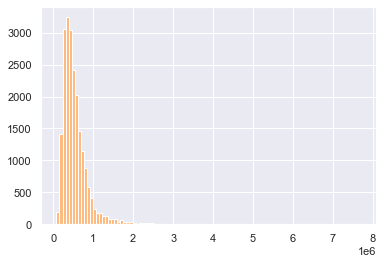

In [30]:
# Examine price
infer_df.price.hist(bins=100);

In [31]:
# Determine price outliers by calculating at least 3 std. dev.'s from the mean
price_outliers_high, price_outliers_low = determine_outliers_cut_off(infer_df.price, 3)
print(price_outliers_low)
print(price_outliers_high)

-560809.3854040758
1644532.2417065967


In [32]:
# Examine bedrooms
display(infer_df.bedrooms.value_counts())

bedrooms_outliers_high, bedrooms_outliers_low = determine_outliers_cut_off(infer_df.bedrooms, 3)
print(bedrooms_outliers_low)
print(bedrooms_outliers_high)

3     9731
4     6849
2     2736
5     1586
6      265
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

0.597736071296461
6.150163088367405


In [33]:
# Examine bathrooms
display(infer_df.bathrooms.value_counts())

bathrooms_outliers_high, bathrooms_outliers_low = determine_outliers_cut_off(infer_df.bathrooms, 3)
print(bathrooms_outliers_low)
print(bathrooms_outliers_high)

2.50    5352
1.00    3794
1.75    3020
2.25    2031
2.00    1913
1.50    1429
2.75    1182
3.00     747
3.50     729
3.25     586
3.75     155
4.00     134
4.50      99
4.25      79
0.75      70
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

-0.18773083208549846
4.424588908649457


In [34]:
# Examine floors
display(infer_df.floors.value_counts())

floors_outliers_high, floors_outliers_low = determine_outliers_cut_off(infer_df.floors, 3)
print(floors_outliers_low)
print(floors_outliers_high)

1.0    10552
2.0     8203
1.5     1888
3.0      609
2.5      161
3.5        7
Name: floors, dtype: int64

-0.12425799643685087
3.116228117818737


-1132.6968074121678
5298.96207351861


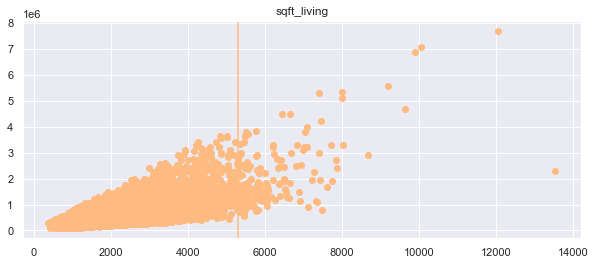

In [35]:
# Examine sqft_living
constant = 3.5
fig, axs = plt.subplots(figsize=(10,4))
axs.scatter(infer_df.sqft_living, infer_df.price)
axs.axvline(infer_df.sqft_living.mean() + constant*infer_df.sqft_living.std())
axs.set_title('sqft_living');

sqft_living_outliers_high, sqft_living_outliers_low = determine_outliers_cut_off(infer_df.sqft_living, constant)
print(sqft_living_outliers_low)
print(sqft_living_outliers_high)

-109464.35251119424
139720.42851492908


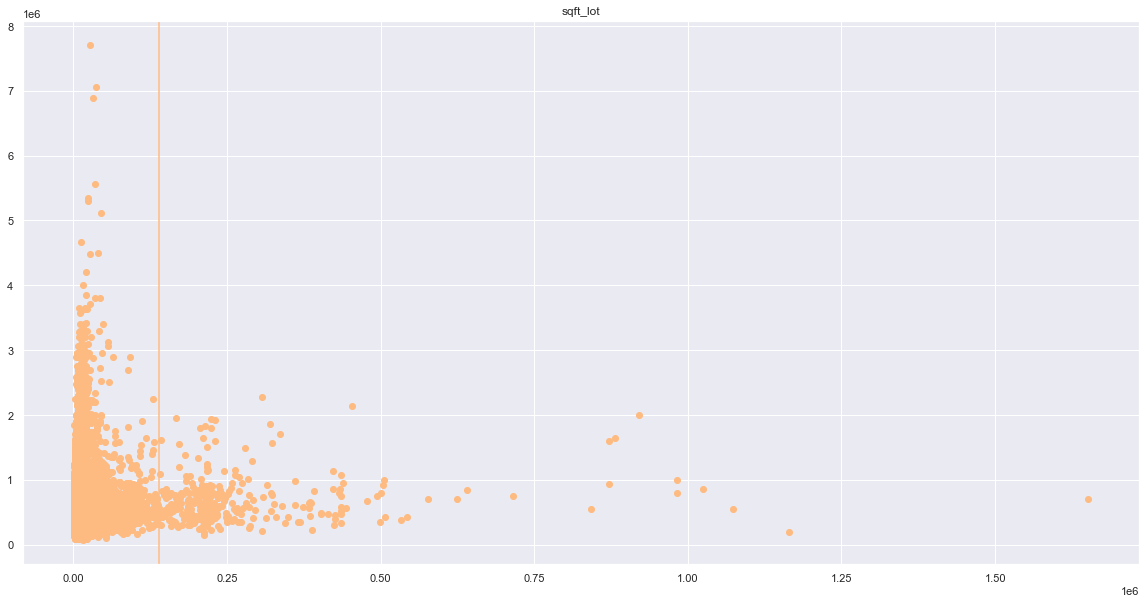

In [36]:
# Examine sqft_lot
constant = 3
fig, axs = plt.subplots(figsize=(20,10))
axs.scatter(infer_df.sqft_lot, infer_df.price)
axs.axvline(infer_df.sqft_lot.mean() + constant*infer_df.sqft_lot.std())
axs.set_title('sqft_lot');

sqft_lot_outliers_high, sqft_lot_outliers_low = determine_outliers_cut_off(infer_df.sqft_lot, constant)
print(sqft_lot_outliers_low)
print(sqft_lot_outliers_high)

-694.9086792059481
4277.249108711084


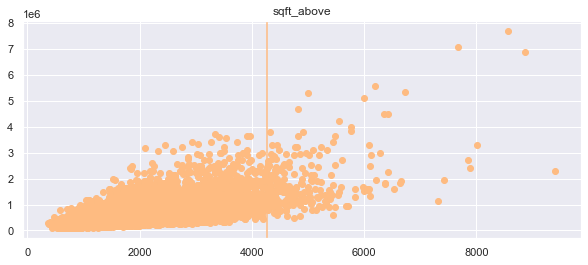

In [37]:
# Examine sqft_above
constant = 3
fig, axs = plt.subplots(figsize=(10,4))
axs.scatter(infer_df.sqft_above, infer_df.price)
axs.axvline(infer_df.sqft_above.mean() + constant*infer_df.sqft_above.std())
axs.set_title('sqft_above');

sqft_above_outliers_high, sqft_above_outliers_low = determine_outliers_cut_off(infer_df.sqft_above, constant)
print(sqft_above_outliers_low)
print(sqft_above_outliers_high)

-1034.101863463904
1605.9759064144178


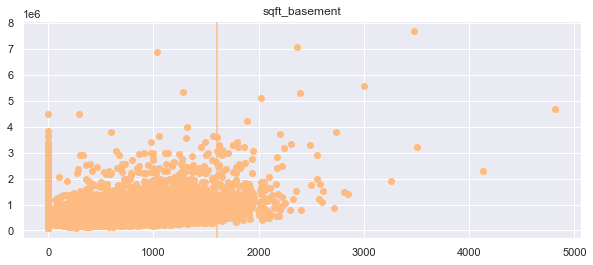

In [38]:
# Examine sqft_basement
constant = 3
fig, axs = plt.subplots(figsize=(10,4))
axs.scatter(infer_df.sqft_basement, infer_df.price)
axs.axvline(infer_df.sqft_basement.mean() + constant*infer_df.sqft_basement.std())
axs.set_title('sqft_basement');

sqft_basement_outliers_high, sqft_basement_outliers_low = determine_outliers_cut_off(infer_df.sqft_basement, constant)
print(sqft_basement_outliers_low)
print(sqft_basement_outliers_high)

#### Remove Outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21016 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21016 non-null  int64         
 1   date           21016 non-null  datetime64[ns]
 2   price          21016 non-null  float64       
 3   bedrooms       21016 non-null  int64         
 4   bathrooms      21016 non-null  float64       
 5   sqft_living    21016 non-null  int64         
 6   sqft_lot       21016 non-null  int64         
 7   floors         21016 non-null  float64       
 8   waterfront     21016 non-null  int32         
 9   view           21016 non-null  int64         
 10  condition      21016 non-null  int64         
 11  grade          21016 non-null  int64         
 12  sqft_above     21016 non-null  int64         
 13  sqft_basement  21016 non-null  int64         
 14  yr_built       21016 non-null  int64         
 15  yr_renovated   2101

None

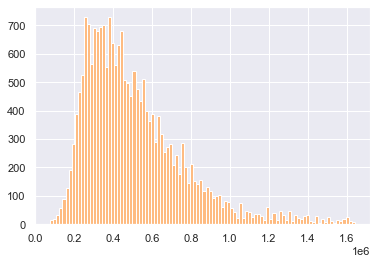

In [39]:
infer_df = infer_df[infer_df.price < price_outliers_high]
display(infer_df.info())
infer_df.price.hist(bins=100);

In [40]:
infer_df = infer_df[infer_df.bedrooms < bedrooms_outliers_high]
display(infer_df.info())
infer_df.bedrooms.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20964 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20964 non-null  int64         
 1   date           20964 non-null  datetime64[ns]
 2   price          20964 non-null  float64       
 3   bedrooms       20964 non-null  int64         
 4   bathrooms      20964 non-null  float64       
 5   sqft_living    20964 non-null  int64         
 6   sqft_lot       20964 non-null  int64         
 7   floors         20964 non-null  float64       
 8   waterfront     20964 non-null  int32         
 9   view           20964 non-null  int64         
 10  condition      20964 non-null  int64         
 11  grade          20964 non-null  int64         
 12  sqft_above     20964 non-null  int64         
 13  sqft_basement  20964 non-null  int64         
 14  yr_built       20964 non-null  int64         
 15  yr_renovated   2096

None

3    9665
4    6653
2    2732
5    1478
6     245
1     191
Name: bedrooms, dtype: int64

In [41]:
infer_df = infer_df[infer_df.bathrooms < bathrooms_outliers_high]
display(infer_df.info())
infer_df.bathrooms.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20866 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20866 non-null  int64         
 1   date           20866 non-null  datetime64[ns]
 2   price          20866 non-null  float64       
 3   bedrooms       20866 non-null  int64         
 4   bathrooms      20866 non-null  float64       
 5   sqft_living    20866 non-null  int64         
 6   sqft_lot       20866 non-null  int64         
 7   floors         20866 non-null  float64       
 8   waterfront     20866 non-null  int32         
 9   view           20866 non-null  int64         
 10  condition      20866 non-null  int64         
 11  grade          20866 non-null  int64         
 12  sqft_above     20866 non-null  int64         
 13  sqft_basement  20866 non-null  int64         
 14  yr_built       20866 non-null  int64         
 15  yr_renovated   2086

None

2.50    5308
1.00    3793
1.75    3015
2.25    2007
2.00    1908
1.50    1427
2.75    1156
3.00     711
3.50     670
3.25     517
3.75     123
4.00      97
0.75      70
4.25      51
1.25       9
0.50       4
Name: bathrooms, dtype: int64

In [42]:
infer_df = infer_df[infer_df.floors < floors_outliers_high]
display(infer_df.info())
infer_df.floors.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20860 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20860 non-null  int64         
 1   date           20860 non-null  datetime64[ns]
 2   price          20860 non-null  float64       
 3   bedrooms       20860 non-null  int64         
 4   bathrooms      20860 non-null  float64       
 5   sqft_living    20860 non-null  int64         
 6   sqft_lot       20860 non-null  int64         
 7   floors         20860 non-null  float64       
 8   waterfront     20860 non-null  int32         
 9   view           20860 non-null  int64         
 10  condition      20860 non-null  int64         
 11  grade          20860 non-null  int64         
 12  sqft_above     20860 non-null  int64         
 13  sqft_basement  20860 non-null  int64         
 14  yr_built       20860 non-null  int64         
 15  yr_renovated   2086

None

1.0    10460
2.0     7822
1.5     1858
3.0      588
2.5      132
Name: floors, dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20812 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20812 non-null  int64         
 1   date           20812 non-null  datetime64[ns]
 2   price          20812 non-null  float64       
 3   bedrooms       20812 non-null  int64         
 4   bathrooms      20812 non-null  float64       
 5   sqft_living    20812 non-null  int64         
 6   sqft_lot       20812 non-null  int64         
 7   floors         20812 non-null  float64       
 8   waterfront     20812 non-null  int32         
 9   view           20812 non-null  int64         
 10  condition      20812 non-null  int64         
 11  grade          20812 non-null  int64         
 12  sqft_above     20812 non-null  int64         
 13  sqft_basement  20812 non-null  int64         
 14  yr_built       20812 non-null  int64         
 15  yr_renovated   2081

None

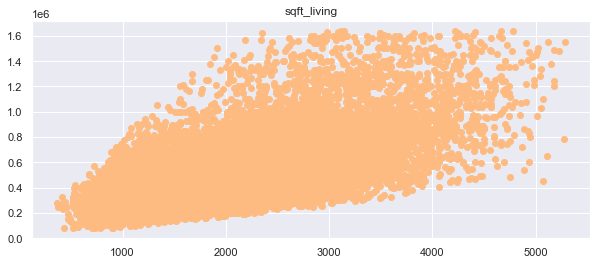

In [43]:
infer_df = infer_df[infer_df.sqft_living < sqft_living_outliers_high]
display(infer_df.info())

constant = 3.5
fig, axs = plt.subplots(figsize=(10,4))
axs.scatter(infer_df.sqft_living, infer_df.price)
axs.set_title('sqft_living');

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20499 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20499 non-null  int64         
 1   date           20499 non-null  datetime64[ns]
 2   price          20499 non-null  float64       
 3   bedrooms       20499 non-null  int64         
 4   bathrooms      20499 non-null  float64       
 5   sqft_living    20499 non-null  int64         
 6   sqft_lot       20499 non-null  int64         
 7   floors         20499 non-null  float64       
 8   waterfront     20499 non-null  int32         
 9   view           20499 non-null  int64         
 10  condition      20499 non-null  int64         
 11  grade          20499 non-null  int64         
 12  sqft_above     20499 non-null  int64         
 13  sqft_basement  20499 non-null  int64         
 14  yr_built       20499 non-null  int64         
 15  yr_renovated   2049

None

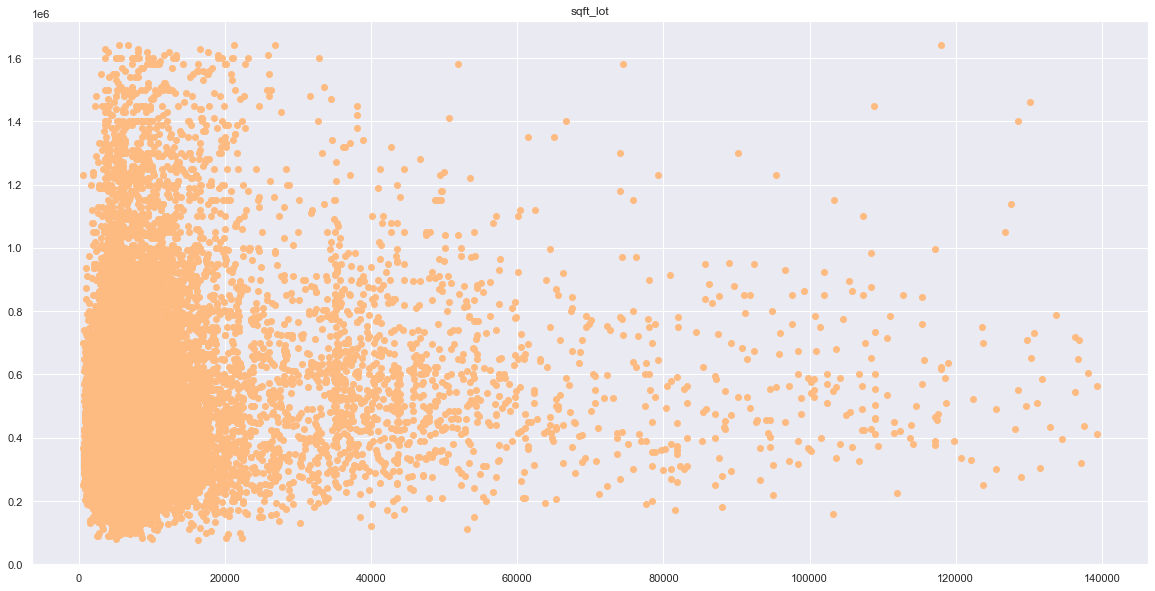

In [44]:
infer_df = infer_df[infer_df.sqft_lot < sqft_lot_outliers_high]
display(infer_df.info())

constant = 3
fig, axs = plt.subplots(figsize=(20,10))
axs.scatter(infer_df.sqft_lot, infer_df.price)
axs.set_title('sqft_lot');

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20422 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20422 non-null  int64         
 1   date           20422 non-null  datetime64[ns]
 2   price          20422 non-null  float64       
 3   bedrooms       20422 non-null  int64         
 4   bathrooms      20422 non-null  float64       
 5   sqft_living    20422 non-null  int64         
 6   sqft_lot       20422 non-null  int64         
 7   floors         20422 non-null  float64       
 8   waterfront     20422 non-null  int32         
 9   view           20422 non-null  int64         
 10  condition      20422 non-null  int64         
 11  grade          20422 non-null  int64         
 12  sqft_above     20422 non-null  int64         
 13  sqft_basement  20422 non-null  int64         
 14  yr_built       20422 non-null  int64         
 15  yr_renovated   2042

None

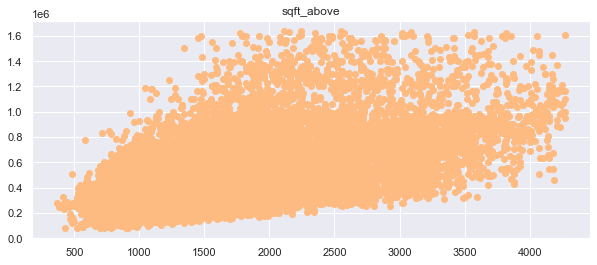

In [45]:
infer_df = infer_df[infer_df.sqft_above < sqft_above_outliers_high]
display(infer_df.info())

constant = 3
fig, axs = plt.subplots(figsize=(10,4))
axs.scatter(infer_df.sqft_above, infer_df.price)
axs.set_title('sqft_above');

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20285 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             20285 non-null  int64         
 1   date           20285 non-null  datetime64[ns]
 2   price          20285 non-null  float64       
 3   bedrooms       20285 non-null  int64         
 4   bathrooms      20285 non-null  float64       
 5   sqft_living    20285 non-null  int64         
 6   sqft_lot       20285 non-null  int64         
 7   floors         20285 non-null  float64       
 8   waterfront     20285 non-null  int32         
 9   view           20285 non-null  int64         
 10  condition      20285 non-null  int64         
 11  grade          20285 non-null  int64         
 12  sqft_above     20285 non-null  int64         
 13  sqft_basement  20285 non-null  int64         
 14  yr_built       20285 non-null  int64         
 15  yr_renovated   2028

None

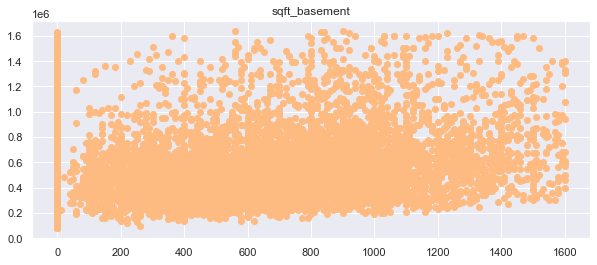

In [46]:
infer_df = infer_df[infer_df.sqft_basement < sqft_basement_outliers_high]
display(infer_df.info())

constant = 3
fig, axs = plt.subplots(figsize=(10,4))
axs.scatter(infer_df.sqft_basement, infer_df.price)
axs.set_title('sqft_basement');

### Identify & Drop Outliers for Predictive Model

In [47]:
# df.loc[df.bedrooms == 33].sort_values('sqft_living', ascending=False).head(20)

In [48]:
# 33 bedrooms for a 1620 sqft house is a mistake. We'll drop those values.
# 9, 10 & 11 bedrooms for houses under 5000 sqft are also a mistake. We'll drop.
df.drop(df.loc[df['bedrooms']==33].index, inplace=True)
df.drop(df.loc[df['bedrooms']==11].index, inplace=True)
df.drop(df.loc[df['bedrooms']==10].index, inplace=True)
df.drop(df.loc[df['bedrooms']==9].index, inplace=True)

df.sort_values('bedrooms', ascending=False).head(10)

id       date      price  bedrooms  bathrooms  sqft_living  \
10946  1652500060 2014-07-11  1650000.0         8       2.75         4040   
12872  8813400155 2014-12-19   808000.0         8       3.75         3460   
17221  1338600225 2014-05-28  1970000.0         8       3.50         4440   
15656  8141200080 2014-08-14   680000.0         8       2.75         2530   
1658   9126101740 2014-12-04   490000.0         8       5.00         2800   
9068   6746700615 2015-03-18   700000.0         8       2.50         2280   
4031    685000115 2014-10-07  2150000.0         8       6.00         4340   
4063   7226500100 2015-02-19   373000.0         8       3.00         2850   
6168   1873400020 2014-07-03   340000.0         8       2.75         2790   
19287  3756900027 2014-11-25   575000.0         8       3.00         3840   

       sqft_lot  floors  waterfront  view  ...  grade  sqft_above  \
10946     20666     1.0           0     0  ...      9        2020   
12872      4600     2.0           0     0  ...      7        2860   
17221      6480     2.0           0     4  ...     10        3140   
15656      4800     2.0           0     0  ...      7        1390   
1658       2580     2.0           0     0  ...      8        1880   
9068       3000     1.5           0     0  ...      7        1210   
4031       9415     2.0           0     0  ...      8        4340   
4063      12714     1.0           0     0  ...      7        2850   
6168       6695     1.0           0     0  ...      7        1470   
19287     15990     1.0           0     0  ...      7        2530   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
10946           2020      1962             0    98004  47.6340 -122.221   
12872            600      1987             0    98105  47.6617 -122.289   
17221           1300      1959             0    98112  47.6310 -122.303   
15656           1140      1901             0    98112  47.6241 -122.305   
1658             920      1997             0    98122  47.6086 -122.303   
9068            1070      1911             0    98105  47.6675 -122.316   
4031               0      1967             0    98004  47.6316 -122.202   
4063               0      1959             0    98055  47.4859 -122.205   
6168            1320      1977             0    98133  47.7565 -122.331   
19287           1310      1961             0    98034  47.7111 -122.211   

       sqft_living15  sqft_lot15  
10946           3670       20500  
12872           2170        3750  
17221           4440        8640  
15656           1540        4800  
1658            1800        2580  
9068            1610        3000  
4031            2050        9100  
4063            1480        4942  
6168            1760        7624  
19287           1380        8172  

[10 rows x 21 columns]

# Inferential Modeling
***

This section shows the iterative approach taken towards finding the best inferential model by first determining relevant features of interest, and then analyzing the coefficients of determination, coefficients of features, p-values, and other statistically relevent aspects of the models. In addition, the findings and results of each iteration/trial is included.

In [49]:
# Create model training and testing data

# Trial 1
# X = infer_df.drop(columns=['price', 'id', 'date', 'condition', 'sqft_above',
#                            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
#                            'lat', 'long', 'sqft_living15', 'sqft_lot15'])

# Trial 2 (Difference from Trial 1--> Dropped grade)
# X = infer_df.drop(columns=['price', 'id', 'date', 'condition', 'grade', 'sqft_above',
#                            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 
#                            'lat', 'long', 'sqft_living15', 'sqft_lot15'])

# Trial 3 (Difference from Trial 2--> Dropped bedrooms and bathrooms)
# X = infer_df.drop(columns=['price', 'id', 'date', 'bedrooms', 'bathrooms', 'condition',
#                            'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
#                            'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

# Trial 4 (Difference from Trial 3--> Dropped waterfront)
# X = infer_df.drop(columns=['price', 'id', 'date', 'bedrooms', 'bathrooms', 'waterfront',
#                            'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
#                            'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

# Trial 5 (Difference from Trial 1--> Dropped waterfront)
# X = infer_df.drop(columns=['price', 'id', 'date', 'waterfront', 'condition', 'sqft_above',
#                            'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
#                            'sqft_living15', 'sqft_lot15'])

# Trial 6 (Difference from Trial 1--> Dropped waterfront, view, grade; Added sqft_above, sqft_basement)
# X = infer_df.drop(columns=['price', 'id', 'date', 'waterfront', 'view', 'condition', 'grade',
#                            'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

# Trial 7 (Difference from Trial 1--> Added condition, sqft_above, sqft_basement)
X = infer_df.drop(columns=['price', 'id', 'date', 'yr_built', 'yr_renovated',
                           'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'])

y = infer_df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

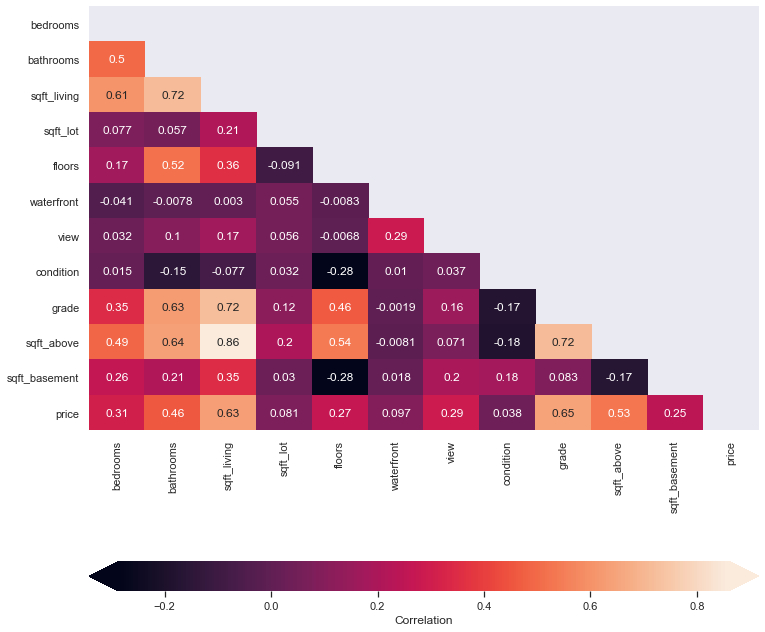

In [50]:
# Show feature correlation of training data
train_data = pd.concat([X_train, y_train], axis=1)
corr = train_data.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)),
            ax=ax,annot=True, cbar_kws={"label": "Correlation",
                                        "orientation": "horizontal",
                                        "pad": .2, "extend": "both"});

# Trial 1 - Multicollinearity Concerns:
# sqft_living & bathrooms
# sqft_living & grade

# Trial 2 - Multicollinearity Concerns:
# sqft_living & bathrooms

# Trials 3, 4 - Multicollinearity Concerns:
# sqft_living & price

# Trial 5 - Multicollinearity Concerns:
# sqft_living & bathrooms
# sqft_living & grade

# Trial 6 - Multicollinearity Concerns:
# sqft_living & bathrooms
# sqft_living & sqft_above

# Trial 7 - Multicollinearity Concerns:
# sqft_living & bathrooms
# sqft_living & grade
# sqft_living & sqft_above
# sqft_above & grade

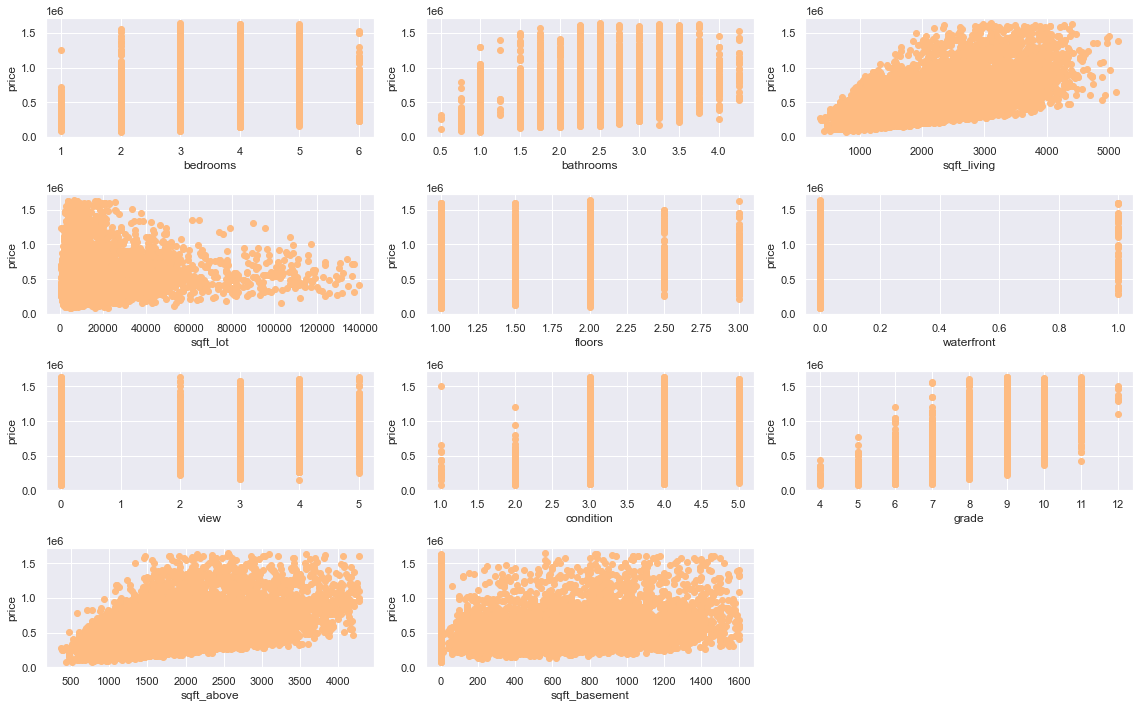

In [51]:
# Show scatter plots of training data compared to target

# Trials 1, 2, 5, 6
# fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(16, 10))

# Trials 3, 4
# fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 7))

# Trial 7 
fig, axes = plt.subplots(ncols=3, nrows=4, figsize=(16, 10))

fig.set_tight_layout(True)

for index, col in enumerate(X_train.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train[col], y_train) #, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel('price')

    
# Trial 1
# fig.delaxes(axes[2][2])

# Trials 2, 5, 6
# fig.delaxes(axes[2][1])
# fig.delaxes(axes[2][2])

# Trial 3
# fig.delaxes(axes[1][2])

# Trial 4
# fig.delaxes(axes[1][1])
# fig.delaxes(axes[1][2])

# Trial 7
fig.delaxes(axes[3][2])

In [52]:
# Create baseline model with DummyRegressor
baseline = DummyRegressor()
baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)

-0.000413773641522841

In [53]:
# Run first model with highested correlated feature ('sqft_living')

# Trials 1, 5, 7
most_correlated_feature = 'grade'

# Trial 2, 3, 4, 6
# most_correlated_feature = 'sqft_living'

first_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

first_scores = cross_validate(estimator=first_model,
                                 X=X_train[[most_correlated_feature]],
                                 y=y_train, return_train_score=True,
                                 cv=splitter)

print('First Model')
print('Train score: ', first_scores['train_score'].mean())
print('Validation score: ', first_scores['test_score'].mean())

# Trials 1, 5, 7:
# First Model
# Train score:  0.414588498037074
# Validation score:  0.42492697175493815

# Trials 2, 3, 4, 6:
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

First Model
Train score:  0.414588498037074
Validation score:  0.42492697175493815


In [54]:
# Examine OLS summary table to examine coefficients of first model
sm.OLS(y_train, sm.add_constant(X_train[[most_correlated_feature]])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                 1.090e+04
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:05:31   Log-Likelihood:            -2.0643e+05
No. Observations:               15213   AIC:                         4.129e+05
Df Residuals:                   15211   BIC:                         4.129e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -6.43e+05    1.1e+04    -58.250      0.000   -6.65e+05   -6.21e+05
grade       1.507e+05   1443.317    104.418      0.000    1.48e+05    1.54e+05
==============================================================================
Omnibus:                     3113.165   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7404.306
Skew:                           1.147   Prob(JB):                         0.00
Kurtosis:                       5.533   Cond. No.                         56.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
# Run second model with additional, correlated features

# Trial 1
# select_features = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#                            'floors', 'waterfront', 'view', 'grade']].copy()

# Trial 2
# select_features = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#                            'floors', 'waterfront', 'view']].copy()

# Trial 3
# select_features = X_train[['sqft_living', 'sqft_lot',
#                            'floors', 'waterfront', 'view']].copy()

# Trial 4
# select_features = X_train[['sqft_living', 'sqft_lot',
#                            'floors', 'view']].copy()

# Trial 5
# select_features = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#                            'floors', 'view', 'grade']].copy()


# Trial 6
# select_features = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#                            'floors', 'sqft_above', 'sqft_basement']].copy()

# Trial 7
select_features = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                           'floors', 'waterfront', 'view', 'condition', 'grade',
                           'sqft_above', 'sqft_basement']].copy()

second_model = LinearRegression()

second_model_scores = cross_validate(estimator=second_model,
                                     X=select_features, y=y_train,
                                     return_train_score=True, cv=splitter)

print('Second Model')
print('Train score: ', second_model_scores['train_score'].mean())
print('Validation score: ', second_model_scores['test_score'].mean())
print('First Model')
print('Train score: ', first_scores['train_score'].mean())
print('Validation score: ', first_scores['test_score'].mean())

# Trial 1:
# Second Model
# Train score:  0.5115381808835865
# Validation score:  0.5185176054579146
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

# Trial 2:
# Second Model
# Train score:  0.4472809084845386
# Validation score:  0.4499643386092405
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

# Trial 3:
# Second Model
# Train score:  0.4405937590300398
# Validation score:  0.44493075864886356
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

# Trial 4:
# Second Model
# Train score:  0.43840158886968944
# Validation score:  0.4432119138653097
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

# Trial 5:
# Second Model
# Train score:  0.5087900596439866
# Validation score:  0.5161810311821672
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

# Trial 6:
# Second Model
# Train score:  0.4151475204412618
# Validation score:  0.42144705522457837
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

# Trial 7:
# Second Model
# Train score:  0.5322909097073351
# Validation score:  0.5360463814225995
# First Model
# Train score:  0.414588498037074
# Validation score:  0.42492697175493815

Second Model
Train score:  0.5322909097073351
Validation score:  0.5360463814225995
First Model
Train score:  0.414588498037074
Validation score:  0.42492697175493815


In [56]:
# Examine OLS summary table to examine coefficients of second model
sm.OLS(y_train, sm.add_constant(select_features)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1581.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:05:31   Log-Likelihood:            -2.0474e+05
No. Observations:               15213   AIC:                         4.095e+05
Df Residuals:                   15201   BIC:                         4.096e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.994e+05   1.58e+04    -37.877      0.000    -6.3e+05   -5.68e+05
bedrooms      -1.484e+04   2090.744     -7.098      0.000   -1.89e+04   -1.07e+04
bathrooms     -2.902e+04   3197.668     -9.075      0.000   -3.53e+04   -2.28e+04
sqft_living     133.2305     19.669      6.774      0.000      94.677     171.784
sqft_lot         -0.9076      0.108     -8.428      0.000      -1.119      -0.697
floors         2.291e+04   3583.347      6.394      0.000    1.59e+04    2.99e+04
waterfront     2.363e+05   2.46e+04      9.591      0.000    1.88e+05    2.85e+05
view            3.65e+04   1612.894     22.631      0.000    3.33e+04    3.97e+04
condition      4.779e+04   2247.517     21.264      0.000    4.34e+04    5.22e+04
grade          1.009e+05   2053.825     49.135      0.000    9.69e+04    1.05e+05
sqft_above      -17.0751     19.609     -0.871      0.384     -55.510      21.360
sqft_basement    35.7685     19.528      1.832      0.067      -2.509      74.046
==============================================================================
Omnibus:                     2548.144   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6318.627
Skew:                           0.939   Prob(JB):                         0.00
Kurtosis:                       5.539   Cond. No.                     3.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# Run third model with features with high p-value removed

# Remove features due to high p-value and possible multicollinearity
# Trials 1, 3, 4, 5
# N/A

# Trial #2
# less_features = select_features.drop(columns=['bathrooms']).copy()

# Trial #6
# less_features = select_features.drop(columns=['bathrooms', 'sqft_above', 'sqft_basement']).copy()

# Trial #7a
# less_features = select_features.drop(columns=['floors', 'sqft_above', 'sqft_basement']).copy()

# Trial #7b
less_features = select_features.drop(columns=['floors', 'waterfront', 'sqft_above', 'sqft_basement']).copy()

third_model = LinearRegression()

third_model_scores = cross_validate(estimator=third_model,
                                     X=less_features, y=y_train,
                                     return_train_score=True, cv=splitter)

print('Third Model')
print('Train score: ', third_model_scores['train_score'].mean())
print('Validation score: ', third_model_scores['test_score'].mean())
print('Second Model')
print('Train score: ', second_model_scores['train_score'].mean())
print('Validation score: ', second_model_scores['test_score'].mean())
print('First Model')
print('Train score: ', first_scores['train_score'].mean())
print('Validation score: ', first_scores['test_score'].mean())

# Trial 2:
# Third Model
# Train score:  0.4472589810970505
# Validation score:  0.4499575049891514
# Second Model
# Train score:  0.4472809084845386
# Validation score:  0.4499643386092405
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

# Trial 6:
# Third Model
# Train score:  0.4120920473349818
# Validation score:  0.41827420141563426
# Second Model
# Train score:  0.4151475204412618
# Validation score:  0.42144705522457837
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

# Trial 7a:
# Third Model
# Train score:  0.5277460988907076
# Validation score:  0.5323939628237843
# Second Model
# Train score:  0.5322909097073351
# Validation score:  0.5360463814225995
# First Model
# Train score:  0.3976366000836915
# Validation score:  0.40635354544352903

# Trial 7b:
# Third Model
# Train score:  0.5249436553249848
# Validation score:  0.5300064733067893
# Second Model
# Train score:  0.5322909097073351
# Validation score:  0.5360463814225995
# First Model
# Train score:  0.414588498037074
# Validation score:  0.42492697175493815

Third Model
Train score:  0.5249436553249848
Validation score:  0.5300064733067893
Second Model
Train score:  0.5322909097073351
Validation score:  0.5360463814225995
First Model
Train score:  0.414588498037074
Validation score:  0.42492697175493815


In [58]:
# Examine OLS summary table to examine coefficients of third model
# Trials 1, 3, 4, 5
# N/A

# Trials 2, 6, 7
sm.OLS(y_train, sm.add_constant(less_features)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     2415.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:05:31   Log-Likelihood:            -2.0485e+05
No. Observations:               15213   AIC:                         4.097e+05
Df Residuals:                   15205   BIC:                         4.098e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.685e+05   1.57e+04    -36.228      0.000   -5.99e+05   -5.38e+05
bedrooms    -1.588e+04   2099.420     -7.565      0.000      -2e+04   -1.18e+04
bathrooms   -2.076e+04   2989.773     -6.944      0.000   -2.66e+04   -1.49e+04
sqft_living   130.2985      3.461     37.650      0.000     123.515     137.082
sqft_lot       -1.0648      0.106    -10.040      0.000      -1.273      -0.857
view         4.341e+04   1533.823     28.303      0.000    4.04e+04    4.64e+04
condition    4.968e+04   2203.812     22.543      0.000    4.54e+04     5.4e+04
grade        9.691e+04   1990.903     48.678      0.000     9.3e+04    1.01e+05
==============================================================================
Omnibus:                     2537.074   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6130.336
Skew:                           0.944   Prob(JB):                         0.00
Kurtosis:                       5.472   Cond. No.                     1.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
# Build final model and score it
# Trial 1
# final_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#                   'floors', 'waterfront', 'view', 'grade']

# Trial 2
# final_features = ['bedrooms', 'sqft_living', 'sqft_lot',
#                   'floors', 'waterfront', 'view']

# Trial 3
# final_features = ['sqft_living', 'sqft_lot',
#                   'floors', 'waterfront', 'view']

# Trial 4
# final_features = ['sqft_living', 'sqft_lot',
#                   'floors', 'view']

# Trial 5
# final_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#                   'floors', 'view', 'grade']

# Trial 6
# final_features = ['bedrooms', 'sqft_living', 'sqft_lot', 'floors']

# Trial 7a
# final_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#                   'waterfront', 'view', 'condition', 'grade']

# Trial 7b
final_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                  'view', 'condition', 'grade']

X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train)

final_model.score(X_test_final, y_test)

# Trial 1 Score: 0.5122565930691938
# Trial 2 Score: 0.45218493940429394
# Trial 3 Score: 0.4449265646174718
# Trial 4 Score: 0.4449057795826621
# Trial 5 Score: 0.5120769199763275
# Trial 6 Score: 0.4203671368154732
# Trial 7a Score: 0.527617569659234
# Trial 7b Score: 0.527653369069877

0.527653369069877

## Results
***
This section provides the RMSE, coefficients of features, intercept, and the four assumptions of linear regression for the final inferential model.

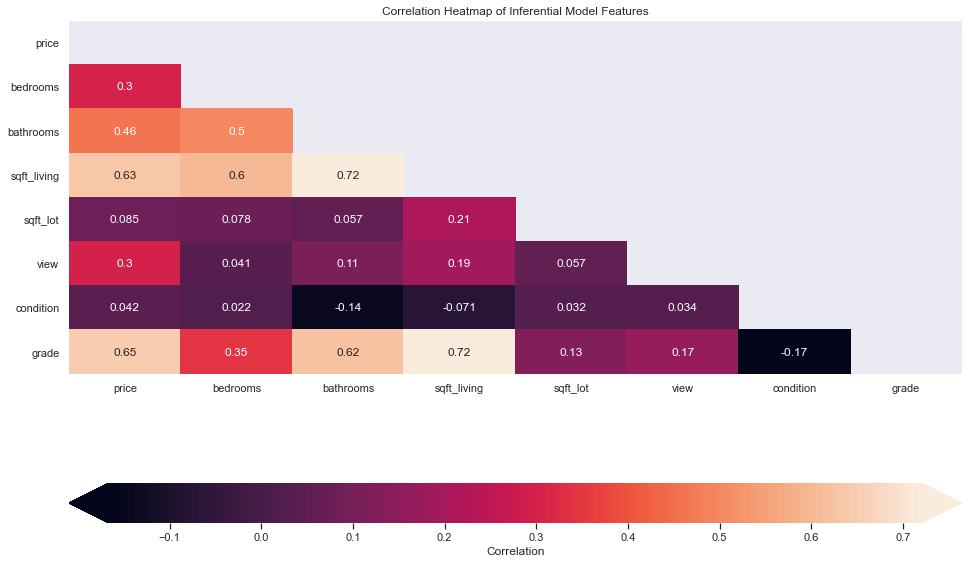

In [60]:
# Show feature correlation of training data

# Trial 1
# final_features_include_price = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#                                 'floors', 'waterfront', 'view', 'grade']

# Trial 2: 
# final_features_include_price = ['price', 'bedrooms', 'sqft_living', 'sqft_lot',
#                                 'floors', 'waterfront', 'view']

# Trial 3: 
# final_features_include_price = ['price', 'sqft_living', 'sqft_lot',
#                                 'floors', 'waterfront', 'view']

# Trial 4:
# final_features_include_price = ['price', 'sqft_living', 'sqft_lot', 'floors', 'view']

# Trial 5:
# final_features_include_price = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
#                                 'sqft_lot', 'floors', 'view', 'grade']

# Trial 6:
# final_features_include_price = ['price', 'bedrooms', 'sqft_living', 'sqft_lot', 'floors']

# Trial 7a:
# final_features_include_price = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
#                                 'waterfront', 'view', 'condition', 'grade']

# Trial 7b:
final_features_include_price = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
                                'sqft_lot', 'view', 'condition', 'grade']


final_features_infer_df = infer_df[final_features_include_price]
corr = final_features_infer_df.corr()

fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)),
            ax=ax,annot=True, cbar_kws={"label": "Correlation",
                                        "orientation": "horizontal",
                                        "pad": .2, "extend": "both"})
ax.set_title('Correlation Heatmap of Inferential Model Features');
plt.savefig('./data/correlation_heatmap.jpg', dpi=300)

In [61]:
# Check RMSE
RMSE = mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

RMSE

# Trial 1 RMSE: 171891.21890108107
# Trial 2 RMSE: 182169.2084828494
# Trial 3 RMSE: 183372.0791291402
# Trial 4 RMSE: 183375.5123319613
# Trial 5 RMSE: 171922.8763082007
# Trial 6 RMSE: 187384.85530621544
# Trial 7a RMSE: 169162.79631882257
# Trial 7b RMSE: 169156.38621255787

169156.38621255787

In [62]:
# Coefficients and intercept of final model
print(pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients"))
print("Intercept:", final_model.intercept_)

# Trial 1:
# bedrooms       -12403.223041
# bathrooms      -24266.956596
# sqft_living       134.121810
# sqft_lot           -1.088879
# floors         -10654.493719
# waterfront     229531.849627
# view            40836.318305
# grade           93085.076678
# Name: Coefficients, dtype: float64
# Intercept: -366070.7543283864

# Trial 2:
# bedrooms       -29063.830949
# sqft_living       213.256807
# sqft_lot           -1.030757
# floors          22355.715531
# waterfront     194527.027628
# view            45831.812383
# Name: Coefficients, dtype: float64
# Intercept: 136144.5077016906

# Trial 3:
# sqft_living       191.904577
# sqft_lot           -0.919129
# floors          25587.279592
# waterfront     202699.625657
# view            47821.575812
# Name: Coefficients, dtype: float64
# Intercept: 75236.04639607953

# Trial 4:
# sqft_living      190.853129
# sqft_lot          -0.870734
# floors         26097.979106
# view           51603.310306
# Name: Coefficients, dtype: float64
# Intercept: 75743.4946812251

# Trial 5:
# bedrooms      -12935.899346
# bathrooms     -24223.335353
# sqft_living      133.802466
# sqft_lot          -1.035701
# floors         -9878.714194
# view           45113.873883
# grade          92505.116943
# Name: Coefficients, dtype: float64
# Intercept: -361427.00863892934

# Trial 6:
# bedrooms      -35927.312809
# sqft_living      229.127926
# sqft_lot          -0.988000
# floors         15505.418021
# Name: Coefficients, dtype: float64
# Intercept: 150018.0302155278

# Trial 7a:
# bedrooms       -15310.733187
# bathrooms      -21054.230584
# sqft_living       130.654034
# sqft_lot           -1.114860
# waterfront     231748.926119
# view            39120.879396
# condition       49844.313685
# grade           97399.866558
# Name: Coefficients, dtype: float64
# Intercept: -573847.2957910688

# Trial 7b:
# bedrooms      -15882.999485
# bathrooms     -20761.202482
# sqft_living      130.298547
# sqft_lot          -1.064769
# view           43412.287164
# condition      49681.336403
# grade          96913.876757
# Name: Coefficients, dtype: float64
# Intercept: -568477.6204495409

bedrooms      -15882.999485
bathrooms     -20761.202482
sqft_living      130.298547
sqft_lot          -1.064769
view           43412.287164
condition      49681.336403
grade          96913.876757
Name: Coefficients, dtype: float64
Intercept: -568477.6204495409


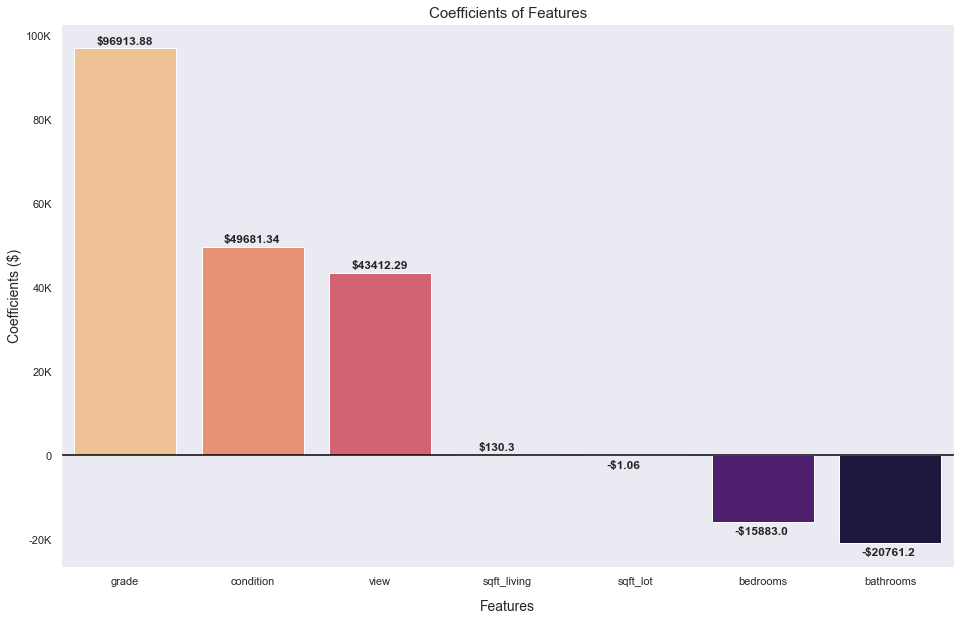

In [63]:
# Trial 7b
coef_s = pd.Series(final_model.coef_, index=X_train_final.columns, name="Coefficients")
coef_s.sort_values(ascending=False, inplace=True)

sns.set_style(style='dark')
fig, ax = plt.subplots(figsize=(16, 10))
ax = sns.barplot(coef_s.index, coef_s.values, palette='magma_r')#, color=colors_ax)
ax.axhline(y=0, color='black')
ax.set_xlabel('Features', fontsize=14, labelpad=13)
ax.set_ylabel('Coefficients ($)', fontsize=14)
ax.set_title('Coefficients of Features', fontsize=15)
ax.ticklabel_format(axis='y', useOffset=False, style='plain')
y = np.array([-20000, 0, 20000, 40000, 60000, 80000, 100000])
y_ticks_labels = ["-20K","0", "20K", "40K", "60K", "80K", "100K"]
ax.set_yticks(y)
ax.set_yticklabels(y_ticks_labels)
xlocs, xlabs = plt.xticks()
for i, v in enumerate(coef_s):
    string = ''
    if v > 0:
        string = '$' + str(abs(round(v,2)))
        plt.text(xlocs[i] - 0.225, v + 1000, string, weight='bold')
    else:
        string = '-$' + str(abs(round(v,2)))
        plt.text(xlocs[i] - 0.225, v - 3000, string, weight='bold')
plt.savefig('./data/coefficients.jpg', dpi=300);

In [64]:
# Checkinng independence (aka no multicollinearity) assumption holds
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

# Trial 1:
# bedrooms       21.353913
# bathrooms      24.684748
# sqft_living    21.009740
# sqft_lot        1.756314
# floors         13.073733
# waterfront      1.098957
# view            1.239649
# grade          32.465846
# Name: Variance Inflation Factor, dtype: float64

# Trial 2: 
# bedrooms       14.387326
# sqft_living    14.998293
# sqft_lot        1.705328
# floors          7.919926
# waterfront      1.098914
# view            1.231901
# Name: Variance Inflation Factor, dtype: float64

# Trial 3: 
# sqft_living    8.113156
# sqft_lot       1.698304
# floors         6.783588
# waterfront     1.098832
# view           1.225531
# Name: Variance Inflation Factor, dtype: float64

# Trial 4:
# sqft_living    8.080519
# sqft_lot       1.692461
# floors         6.774367
# view           1.122524
# Name: Variance Inflation Factor, dtype: float64

# Trial 5:
# bedrooms       21.351724
# bathrooms      24.684676
# sqft_living    20.983958
# sqft_lot        1.750573
# floors         13.064506
# view            1.137428
# grade          32.464611
# Name: Variance Inflation Factor, dtype: float64

# Trial 6:
# bedrooms       14.299366
# sqft_living    14.393143
# sqft_lot        1.699181
# floors          7.882150
# Name: Variance Inflation Factor, dtype: float64

# Trial 7a:
# bedrooms       24.192977
# bathrooms      22.115402
# sqft_living    22.793305
# sqft_lot        1.728665
# waterfront      1.098486
# view            1.229774
# condition      20.103667
# grade          45.568216
# Name: Variance Inflation Factor, dtype: float64

# Trial 7b:
# bedrooms       24.185220
# bathrooms      22.113130
# sqft_living    22.772153
# sqft_lot        1.723913
# view            1.129638
# condition      20.098086
# grade          45.567261
# Name: Variance Inflation Factor, dtype: float64

bedrooms       24.185220
bathrooms      22.113130
sqft_living    22.772153
sqft_lot        1.723913
view            1.129638
condition      20.098086
grade          45.567261
Name: Variance Inflation Factor, dtype: float64

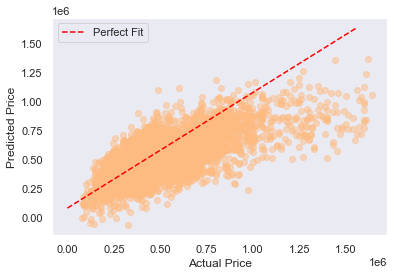

In [65]:
# Checking linearity assumption holds
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="red", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

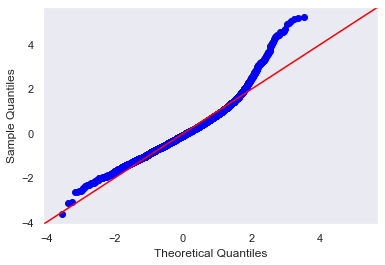

In [66]:
# Checkinng normality assumption holds
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

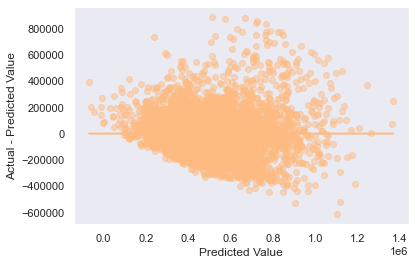

In [67]:
# Checking homoscedasticity assumption holds
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## Predictive Modeling
***
In this section, we take an iterative approach to create a predictive model using many correlated features. We'll normalize and scale all of the data.

In [68]:
# Create model training and testing data
X = df.drop(['price'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

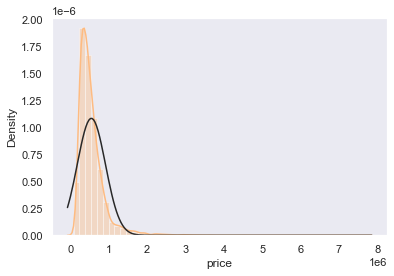

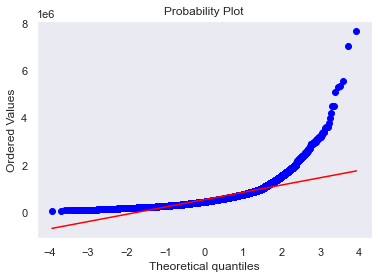

In [69]:
# Examine target ('price') distribution
sns.distplot(y_train, fit=stats.norm)
fig = plt.figure()
stats.probplot(y_train, plot=plt);

In [70]:
# Run log function to normalize target data
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

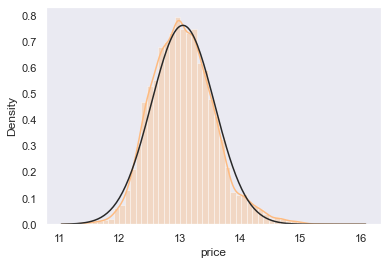

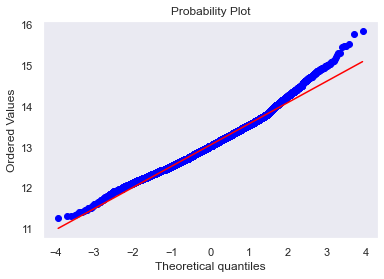

In [71]:
# Re-examine target ('price') 
sns.distplot(y_train_log, fit=stats.norm)
fig = plt.figure()
stats.probplot(y_train_log, plot=plt);

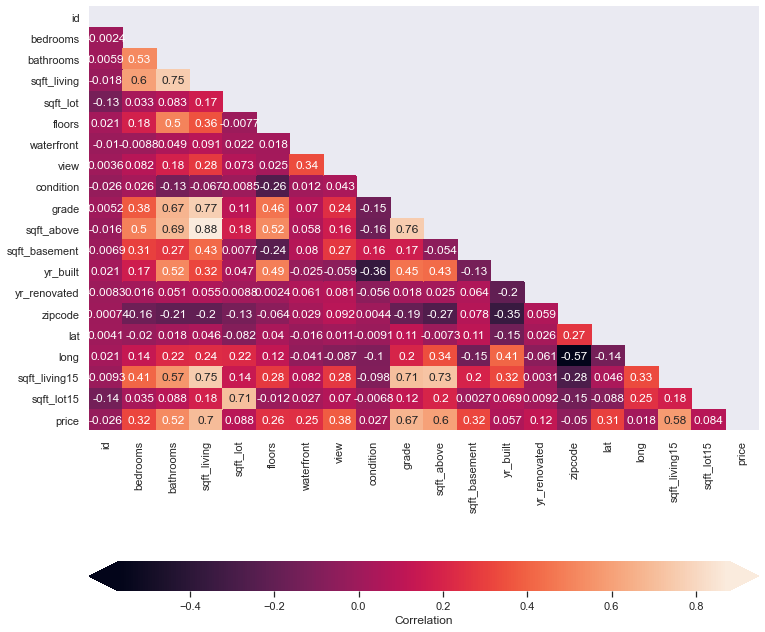

In [72]:
# Show feature correlation of training data
train_data = pd.concat([X_train, y_train], axis=1)
corr = train_data.corr()

fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype=bool)),
            ax=ax,annot=True, cbar_kws={"label": "Correlation",
                                        "orientation": "horizontal",
                                        "pad": .2, "extend": "both"});

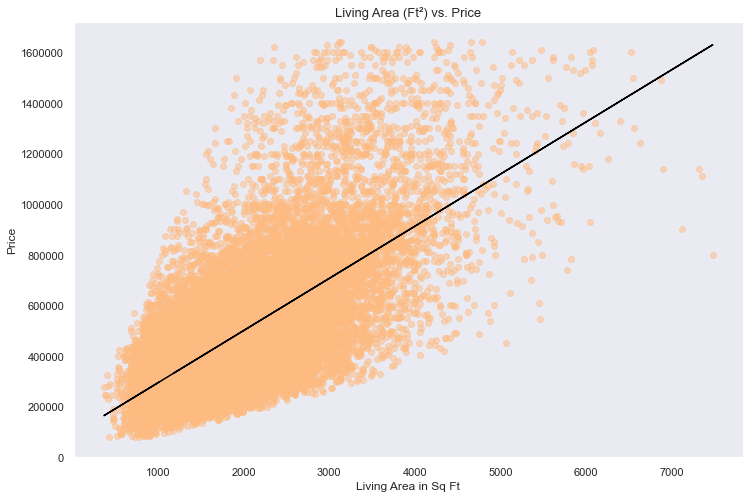

In [73]:
# Show linear correlation with 'price' & 'sqft_living'
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_minus_outliers.sqft_living, df_minus_outliers.price, alpha=0.5)
ax.set_xlabel('Living Area in Sq Ft')
ax.set_ylabel('Price')
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Living Area (Ft²) vs. Price', fontsize=13)
m, b = np.polyfit(df_minus_outliers.sqft_living, df_minus_outliers.price, 1)
plt.plot(df_minus_outliers.sqft_living, m*df_minus_outliers.sqft_living + b, color='black');

In [74]:
# Create baseline model with DummyRegressor
baseline = DummyRegressor()
baseline.fit(X_train, y_train_log)
baseline.score(X_test, y_test_log)

-8.383878485695995e-05

In [75]:
# Run baseline model with highested correlated feature ('sqft_living')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit

first_model = LinearRegression()

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

first_scores = cross_validate(estimator=first_model,
                                 X=X_train[['sqft_living']],
                                 y=y_train_log, return_train_score=True,
                                 cv=splitter)

print('Train score: ', first_scores['train_score'].mean())
print('Validation score: ', first_scores['test_score'].mean())

Train score:  0.4856651402023873
Validation score:  0.47108228336404373


In [76]:
# Add additional, correlated features to X_train data
select_features = X_train[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                             'floors', 'waterfront', 'view', 'condition', 'grade',
                             'sqft_above', 'sqft_basement', 'sqft_living15',
                             'sqft_lot15']].copy()

In [77]:
# Run 2nd model with additional, correlated features
second_model_with_ylog = LinearRegression()

second_model_scores = cross_validate(estimator=second_model_with_ylog,
                                     X=select_features, y=y_train_log,
                                     return_train_score=True, cv=splitter)

print('Second Model')
print('Train score: ', second_model_scores['train_score'].mean())
print('Validation score: ', second_model_scores['test_score'].mean())
print()
print('First Model')
print('Train score: ', first_scores['train_score'].mean())
print('Validation score: ', first_scores['test_score'].mean())

Second Model
Train score:  0.6060248911724325
Validation score:  0.5928302214934851

First Model
Train score:  0.4856651402023873
Validation score:  0.47108228336404373


In [78]:
# Examine OLS summary table to examine coefficients
sm.OLS(y_train_log, sm.add_constant(select_features)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     1874.
Date:                Fri, 19 Nov 2021   Prob (F-statistic):               0.00
Time:                        02:05:37   Log-Likelihood:                -4982.8
No. Observations:               16056   AIC:                             9994.
Df Residuals:                   16042   BIC:                         1.010e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.8257      0.029    369.997      0.000      10.768      10.883
bedrooms         -0.0215      0.004     -5.657      0.000      -0.029      -0.014
bathrooms        -0.0176      0.006     -3.019      0.003      -0.029      -0.006
sqft_living       0.0002    3.4e-05      6.180      0.000       0.000       0.000
sqft_lot       2.574e-07   8.73e-08      2.949      0.003    8.63e-08    4.29e-07
floors            0.0709      0.007     10.736      0.000       0.058       0.084
waterfront        0.3615      0.034     10.498      0.000       0.294       0.429
view              0.0502      0.003     17.775      0.000       0.045       0.056
condition         0.0941      0.004     22.290      0.000       0.086       0.102
grade             0.1815      0.004     45.997      0.000       0.174       0.189
sqft_above    -7.319e-05    3.4e-05     -2.156      0.031      -0.000   -6.64e-06
sqft_basement  5.219e-05   3.37e-05      1.548      0.122   -1.39e-05       0.000
sqft_living15  9.357e-05   6.31e-06     14.821      0.000    8.12e-05       0.000
sqft_lot15    -7.809e-07   1.39e-07     -5.603      0.000   -1.05e-06   -5.08e-07
==============================================================================
Omnibus:                       10.034   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.710
Skew:                           0.042   Prob(JB):                      0.00779
Kurtosis:                       2.914   Cond. No.                     6.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# Remove 'sqft_basement' due to high p-value and possible multicollinearity
less_features = select_features.drop(['sqft_basement'], axis=1).copy()

In [80]:
#Run 3rd model with 'sqft_basement' removed
third_model_with_ylog = LinearRegression()

third_model_scores = cross_validate(estimator=third_model_with_ylog,
                                     X=less_features, y=y_train_log,
                                     return_train_score=True, cv=splitter)

print('Third Model')
print('Train score: ', third_model_scores['train_score'].mean())
print('Validation score: ', third_model_scores['test_score'].mean())
print()
print('Second Model')
print('Train score: ', second_model_scores['train_score'].mean())
print('Validation score: ', second_model_scores['test_score'].mean())
print()
print('First Model')
print('Train score: ', first_scores['train_score'].mean())
print('Validation score: ', first_scores['test_score'].mean())

Third Model
Train score:  0.6060012960573499
Validation score:  0.5928295181535933

Second Model
Train score:  0.6060248911724325
Validation score:  0.5928302214934851

First Model
Train score:  0.4856651402023873
Validation score:  0.47108228336404373


In [81]:
# Use recursive feature elimination and feature selection to examine significant features
X_train_for_RFECV = StandardScaler().fit_transform(less_features)

model_for_RFECV = LinearRegression()

selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train_log)

print("Was the column selected?")
for index, col in enumerate(less_features.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
floors: True
waterfront: True
view: True
condition: True
grade: True
sqft_above: True
sqft_living15: True
sqft_lot15: True


Creating a final model with the settled-on, selected features. This is also where we'll normalize (log) and scale the remaining data (independent variables).

In [82]:
final_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                  'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                  'sqft_living15', 'sqft_lot15']

In [83]:
# Build final model and score it

X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

final_model = LinearRegression()
final_model.fit(X_train_final, y_train_log)

final_model.score(X_test_final, y_test_log)

0.5973223847669575

In [84]:
# Check RMSE
mean_squared_error(y_test_log, final_model.predict(X_test_final), squared=False)

0.332310120170203

Now we need to log and scale independent variables (X_train, X_test) and scale target variable (y_train_log, y_test_log). Note, target already had log applied.

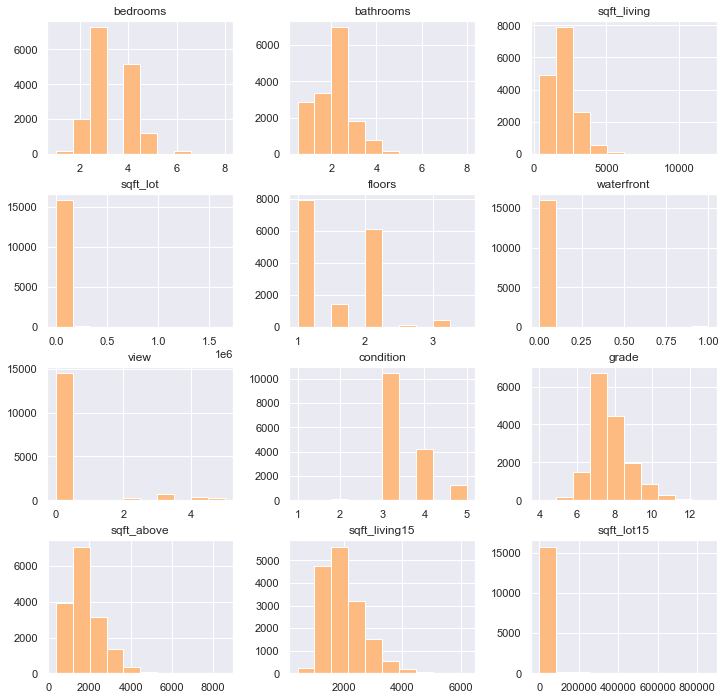

In [85]:
# Examine skew of final features
X_train[final_features].hist(figsize=(12,12));

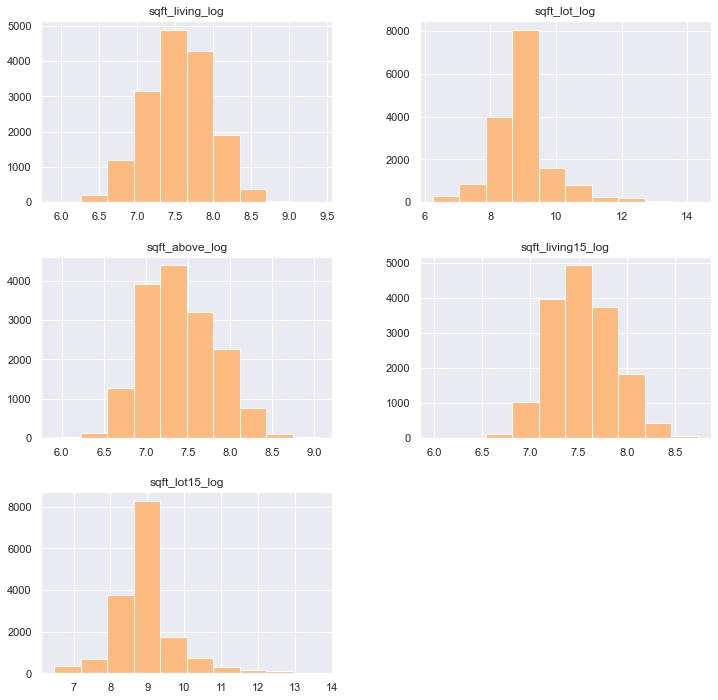

In [86]:
# Apply log to continuous features and re-examine skew
X_train_continuous_log = pd.DataFrame([])
X_train_continuous_log['sqft_living_log'] = np.log(X_train['sqft_living'])
X_train_continuous_log['sqft_lot_log'] = np.log(X_train['sqft_lot'])
X_train_continuous_log['sqft_above_log'] = np.log(X_train['sqft_above'])
X_train_continuous_log['sqft_living15_log'] = np.log(X_train['sqft_living15'])
X_train_continuous_log['sqft_lot15_log'] = np.log(X_train['sqft_lot15'])
X_train_continuous_log.hist(figsize=(12,12));

In [87]:
# Create a DataFrame of all train features (independent & target) so
# everything can be scaled
X_train_discreet = X_train[['bedrooms', 'bathrooms', 'floors', 'waterfront',
                           'view', 'condition', 'grade']]

X_train_cont_disc = pd.concat([X_train_continuous_log, X_train_discreet, y_train_log],
                              axis=1)

train_columns = X_train_cont_disc.columns

In [88]:
# Scale all training features
scaler = StandardScaler()
X_train_log_scaled = scaler.fit_transform(X_train_cont_disc)

In [89]:
# Re-separate target and independent features
X_train_full = pd.DataFrame(X_train_log_scaled, columns=train_columns)

y_train_log_scaled = X_train_full['price']
X_train_log_scaled = X_train_full.drop(columns=['price'])
X_train_log_scaled

sqft_living_log  sqft_lot_log  sqft_above_log  sqft_living15_log  \
0             0.341342      1.621903        0.701227           0.938974   
1            -1.273579     -0.131180       -0.903065          -0.676565   
2            -0.381093     -0.480629       -0.016454          -0.696899   
3            -0.776776      0.232819       -0.409532          -0.717370   
4             1.457558      0.556610        1.810095           1.752909   
...                ...           ...             ...                ...   
16051         0.197557     -0.078363        0.558388           0.779482   
16052        -0.267305      0.127210        0.096586           0.074471   
16053         1.710955      0.510454        1.038236           1.982320   
16054        -0.864543     -1.057355       -0.496722          -1.206285   
16055        -0.626578      0.420383       -0.550635          -0.779616   

       sqft_lot15_log  bedrooms  bathrooms    floors  waterfront      view  \
0            1.875538 -0.416252   0.501470  0.934720   -0.081134 -0.318588   
1           -0.114957 -0.416252  -1.459386 -0.916846   -0.081134 -0.318588   
2           -0.499308  0.699871  -0.152149  0.008937   -0.081134 -0.318588   
3            0.254952 -0.416252  -0.478958 -0.916846   -0.081134 -0.318588   
4            0.652304  1.815995   2.135517  0.934720   -0.081134 -0.318588   
...               ...       ...        ...       ...         ...       ...   
16051       -0.430305  0.699871   0.501470  0.934720   -0.081134 -0.318588   
16052        0.002344  0.699871  -0.478958 -0.916846   -0.081134 -0.318588   
16053        0.876369  1.815995   1.481898  0.934720   -0.081134  2.529545   
16054       -0.785712 -1.532376  -1.459386 -0.916846   -0.081134 -0.318588   
16055        0.359324  1.815995  -1.459386  0.008937   -0.081134 -0.318588   

       condition     grade  
0      -0.630559  1.135535  
1      -0.630559 -0.563878  
2       0.910658 -0.563878  
3       0.910658 -0.563878  
4      -0.630559  1.985242  
...          ...       ...  
16051  -0.630559  0.285829  
16052  -0.630559 -0.563878  
16053   0.910658  1.985242  
16054   0.910658 -0.563878  
16055  -0.630559 -1.413585  

[16056 rows x 12 columns]

In [90]:
# Repeat the above process for the testing data
X_test_continuous_log = pd.DataFrame([])
X_test_continuous_log['sqft_living_log'] = np.log(X_test['sqft_living'])
X_test_continuous_log['sqft_lot_log'] = np.log(X_test['sqft_lot'])
X_test_continuous_log['sqft_above_log'] = np.log(X_test['sqft_above'])
X_test_continuous_log['sqft_living15_log'] = np.log(X_test['sqft_living15'])
X_test_continuous_log['sqft_lot15_log'] = np.log(X_test['sqft_lot15'])

X_test_discreet = X_test[['bedrooms', 'bathrooms', 'floors', 'waterfront',
                          'view', 'condition', 'grade']]
X_test_cont_disc = pd.concat([X_test_continuous_log, X_test_discreet, y_test_log],
                              axis=1)
test_columns = X_test_cont_disc.columns

scaler2 = StandardScaler()
X_test_log_scaled = scaler2.fit_transform(X_test_cont_disc)

X_test_full = pd.DataFrame(X_test_log_scaled, columns=test_columns)

y_test_log_scaled = X_test_full['price']
X_test_log_scaled = X_test_full.drop(columns=['price'])

In [91]:
# Create, run and score final model using log and scaled data
final_model_log_scaled = LinearRegression()
final_model_log_scaled.fit(X_train_log_scaled, y_train_log_scaled)

final_model_log_scaled.score(X_test_log_scaled, y_test_log_scaled)

0.6016290701772524

In [92]:
# Find normalized-scaled RMSE
RMSE_log_scaled = mean_squared_error(y_test_log_scaled,
                   final_model_log_scaled.predict(X_test_log_scaled),
                   squared=False)
RMSE_log_scaled

0.6311663250069252

In [93]:
# Convert normalized-scaled RMSE back to USD
target_log = pd.concat([y_train_log_scaled, y_test_log_scaled], axis=0)

y_hat_train = final_model_log_scaled.predict(X_train_log_scaled)
y_hat_test = final_model_log_scaled.predict(X_test_log_scaled)

def inv_normalize_price(feature_normalized):

    mu = target_log.mean()
    sd = target_log.std()
    return sd*feature_normalized + mu

inv1 = 10**(inv_normalize_price(y_train_log_scaled))
inv2 = 10**(inv_normalize_price(y_hat_train))
inv3 = 10**(inv_normalize_price(y_test_log_scaled))
inv4 = 10**(inv_normalize_price(y_hat_test))

# Transform back to regular $USD price (not log price)
train_mse_non_log = mean_squared_error(inv1, inv2)
test_mse_non_log = mean_squared_error(inv3, inv4)

# Take the square root of MSE to find RMSE * 100 for USD units
non_log_train = round(np.sqrt(train_mse_non_log)*100, 2)
non_log_test = round(np.sqrt(test_mse_non_log)*100, 2)

print(f'Train RMSE non-log: ${non_log_train}')
print(f'Test RMSE non-log: ${non_log_test}')

Train RMSE non-log: $224153.36
Test RMSE non-log: $193722.87


Checking Linear Assumptions (though not as important for predictive purposes)

Linearity

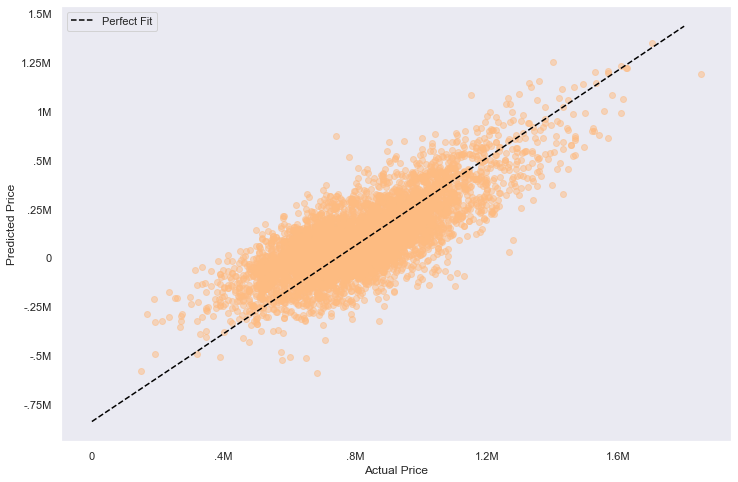

In [94]:
preds = final_model_log_scaled.predict(X_test_log_scaled)
fig, ax = plt.subplots(figsize=(12,8))
pred_xticks = ['0', '0', '.4M', '.8M', '1.2M', '1.6M']
pred_yticks = ['0', '-.75M', '-.5M', '-.25M', '0', '.25M', '.5M', '1M', '1.25M', '1.5M']
perfect_line = np.arange(y_test_log_scaled.min(), y_test_log_scaled.max(), step=.9)
ax.plot(perfect_line, linestyle="--", color="black", label="Perfect Fit")
ax.scatter(y_test_log_scaled+4.1, preds+.4, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.set_xticklabels(pred_xticks)
ax.set_yticklabels(pred_yticks)
ax.legend();

Normality

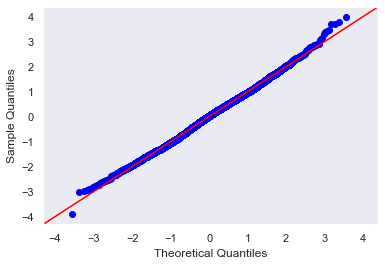

In [95]:
residuals = (y_test_log_scaled - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

Multicollinearity (Independence Assumption)

In [96]:
vif = [variance_inflation_factor(X_train_log_scaled.values, i) for i in range(X_train_log_scaled.shape[1])]
pd.Series(vif, index=X_train_log_scaled.columns, name="Variance Inflation Factor")

sqft_living_log      7.590694
sqft_lot_log         6.879479
sqft_above_log       6.508132
sqft_living15_log    2.693927
sqft_lot15_log       6.628946
bedrooms             1.840879
bathrooms            2.936694
floors               2.317990
waterfront           1.138355
view                 1.264823
condition            1.106391
grade                2.986685
Name: Variance Inflation Factor, dtype: float64

Homoscedasticity

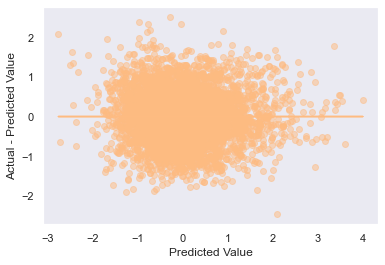

In [97]:
fig, ax = plt.subplots()
ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test_log_scaled))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

## Results
***
Given the provided dataset and linear regression approach, both our inferential and predictive models did not perform as well as we had hoped.
- For the inferential model, homoscedasticity was poor, multicollinearity (VIF) was too high and the RMSE range was north of \$173k+. Linearity and normality performed decently.
- For the predictive model, multicollinearity (VIF) was too high for several features, the model score was an underwhelming .601629 and the RMSE range of \$193k+ was too great to provide any predictive value. Linearity and homoscedasticity were decent and normality was excellent, due to normalizing the data in pre-processing.

## Recommendations
***
We recommend not using our models for inferential or predictive purposes and perhaps looking into different modeling approaches other than linear regression.

## Overall Conclusions
***